### 先定义两个共用的函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def show(image):
    '''显示图片'''
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def imread(image):
    '''
    用来读取图片
    image:为要读取图片的路径
    '''
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    # 用cvtColor()将BGR格式的图片转为RGB格式
    return image

### 1、翻转

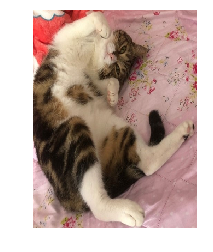

In [2]:
image = imread('./image/test.jpg')
show(image)

#### 翻转使用cv2.flip(image, 1/0/-1)：  
其中1为水平翻转，0为垂直翻转，-1为水平加垂直翻转

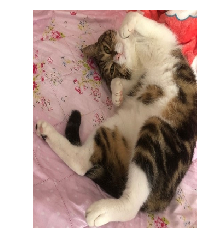

In [3]:
image2 = cv2.flip(image, 1)    # 水平翻转
show(image2)

### 2、裁剪
直接使用矩阵的截取形式就可以

In [4]:
image.shape

(400, 300, 3)

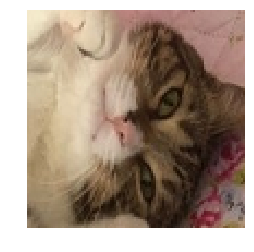

In [5]:
image3 = image[30:130, 100:200]    # 裁剪
show(image3)

### 3、图像算术
图像加法、减法与普通加法、减法的比较

In [6]:
# 图像加法
print(cv2.add(np.uint8([200]), np.uint8([100])))
# 普通加法
print(np.uint8([200])+np.uint8([100]))

[[255]]
[44]


图像加法的最大值为255，超过最大值按照255处理；而普通的uint8加法最大值也是255，超过时从0再开始往上计数。

In [7]:
# 图像减法
print(cv2.subtract(np.uint8([50]), np.uint8([100])))
# 普通减法
print(np.uint8([50])-np.uint8([100]))

[[0]]
[206]


图像减法的最小值为0，低于0则按0处理；普通uint8减法的最小值也为0，低于0则从255开始往下递减。

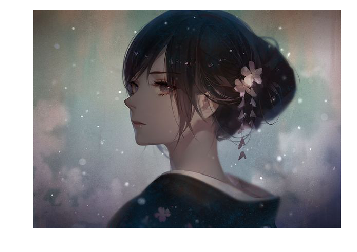

In [8]:
image = imread('./image/image.jpg')
show(image)

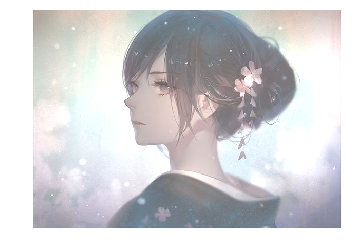

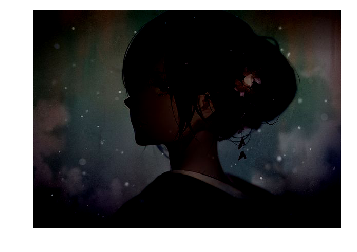

In [9]:
M = np.ones(image.shape, dtype='uint8')*100
image2 = cv2.add(image, M)   # 图像像素整体加100
show(image2)
image3 = cv2.subtract(image, M)
show(image3)

### 4、按位计算
bitwise_and / bitwise_or / bitwise_xor / bitwise_not

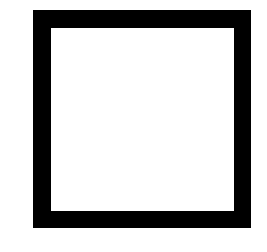

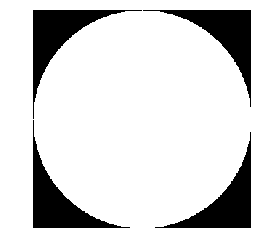

In [10]:
# 创建一个矩形
rectangle = np.zeros((300,300,3), dtype='uint8')
white = (255,255,255)
cv2.rectangle(rectangle, (25,25), (275,275), white, -1)

# 创建一个圆
circle = np.zeros((300,300,3), dtype='uint8')
cv2.circle(circle, (150,150), 150, white, -1)

show(rectangle)
show(circle)

#####  and操作

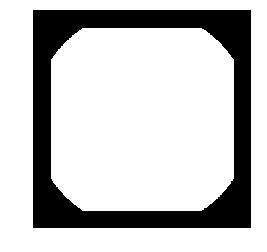

In [11]:
image1 = cv2.bitwise_and(rectangle, circle)
show(image1)
# 与操作，只要有一个为假就整体为假

#### or操作

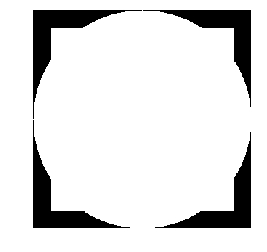

In [12]:
image2 = cv2.bitwise_or(rectangle, circle)
show(image2)
# 只要有一个为真就为真

#### xor操作

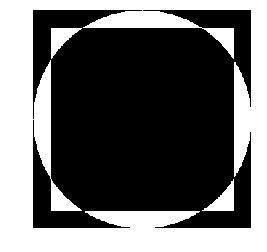

In [13]:
# 真真为假，真假为真
image3 = cv2.bitwise_xor(rectangle, circle)
show(image3)

#### not操作

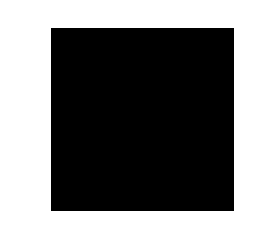

In [14]:
image4 = cv2.bitwise_not(rectangle)
show(image4)

### 5、图像遮挡
其实用到的就是按位与运算

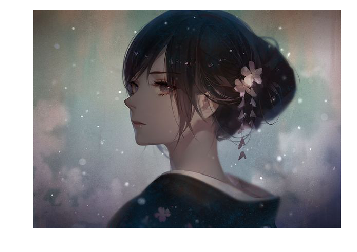

In [15]:
image = imread('./image/image.jpg')
show(image)

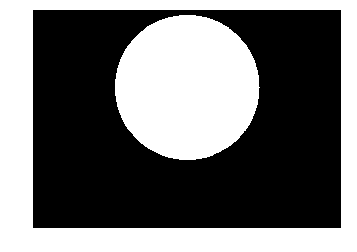

In [16]:
circle = np.zeros(image.shape, dtype='uint8')
white = (255,255,255)
(cx,cy) = image.shape[1]//2, image.shape[1]//4
cv2.circle(circle, (cx,cy), circle.shape[0]//3, white, -1)
show(circle)
# 图像shape是先y后x
# 而cv2的圆心接收是先x后y

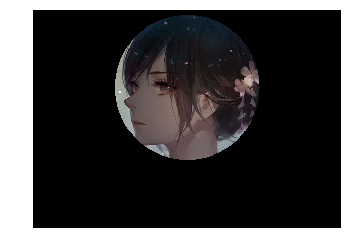

In [17]:
masked = cv2.bitwise_and(image, circle)
show(masked)

### 6、图像的切分与合并
切分用cv2.split(src)；合并用cv2.merge([src1,src2,src3,...])

In [18]:
# 图像切分
image = imread('./image/test.jpg')   # 此时图片的颜色空间已经转换为了RGB颜色空间
(R, G, B) = cv2.split(image)
print(R.shape)
print(G.shape)
print(B.shape)
cv2.imshow('R',R)
cv2.imshow('G',G)
cv2.imshow('B',B)
cv2.waitKey(0)
cv2.destroyAllWindows()

(400, 300)
(400, 300)
(400, 300)


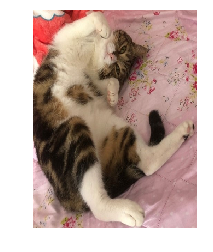

In [19]:
# 图像合并
merged = cv2.merge([R, G, B])
show(merged)

### 7、图像金字塔
生成一组具有不同尺寸、不同分辨率的图像（如：人脸检测中，人脸在图中大小不同）。  
有两种：高斯金字塔和拉普拉斯金字塔

#### 7.1 高斯金字塔
高斯金字塔的顶部是通过将底部图像中的连续的行和列去除得到的。顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值。这样操作一次一个 MxN 的图像就变成了一个 M/2×N/2 的图像。所以这幅图像的面积就变为原来图像面积的四分之一。连续进行这样的操作我们就会得到一个分辨率不断下降的图像金字塔。我们可以使用函数cv2.pyrDown() 和 cv2.pyrUp() 构建图像金字塔。

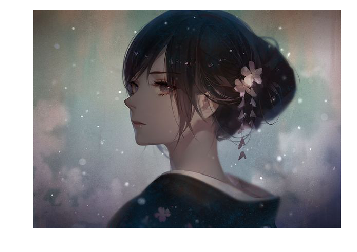

In [20]:
image = imread('./image/image.jpg')
show(image)

In [21]:
image.shape

(424, 600, 3)

(848, 1200, 3)


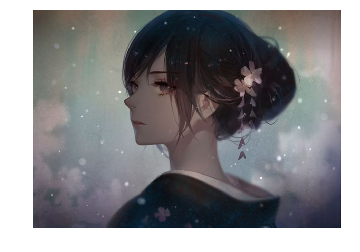

(1696, 2400, 3)


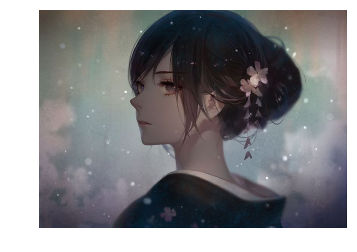

(3392, 4800, 3)


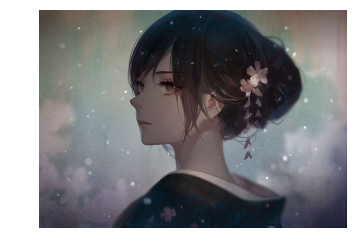

(6784, 9600, 3)


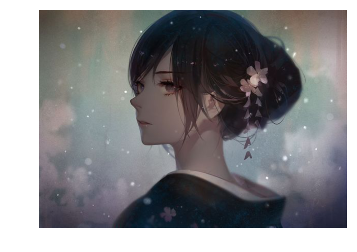

(3392, 4800, 3)


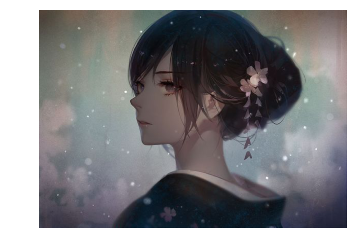

(1696, 2400, 3)


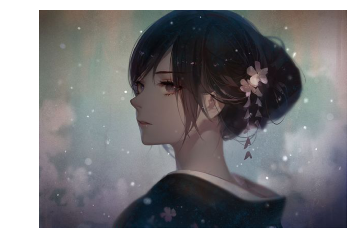

(848, 1200, 3)


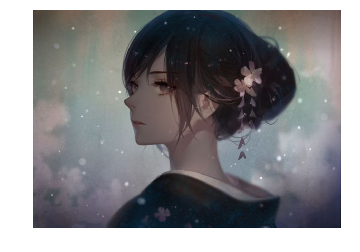

(424, 600, 3)


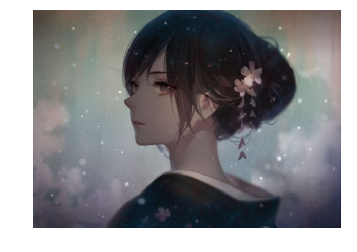

In [22]:
# 提高分辨率
for i in range(4):
    image = cv2.pyrUp(image)
    print(image.shape)
    show(image)
# 降低分辨率
for i in range(4):
    image = cv2.pyrDown(image)
    print(image.shape)
    show(image)

#### 7.2 拉普拉斯金字塔
拉普拉斯金字塔可以由高斯金字塔计算得来，公式如下：
<center>$L_i=G_i-pyrUp(G_{i+1})$</center>
拉普拉金字塔的图像看起来就像边界图，其中很多像素都是0。  
可以用来提取图像的边界。

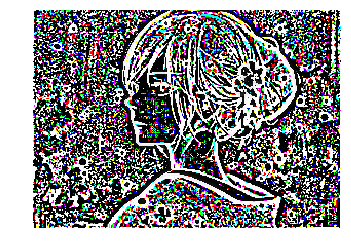

In [23]:
image = imread('./image/image.jpg')
down_image1 = cv2.pyrDown(image)
down_image2 = cv2.pyrDown(down_image1)
up_image = cv2.pyrUp(down_image2)
laplacian = down_image1 - up_image
show(laplacian)